In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("mfd/data/mf_corpora_merged.csv", index_col=0)
news = data.iloc[:34262,:]
reddit = data.iloc[34262:34262 + 17886, :]
twitter = data.iloc[34262 + 17886:, :]

### Number of tokens per example

In [3]:
import spacy
nlp = spacy.load("en_core_web_md")

In [4]:
from tqdm import tqdm
num_toks = [len(doc) for doc in tqdm(nlp.pipe(data["sentence"], n_process=-1))]

87135it [01:05, 1323.86it/s]


In [6]:
data["num_tokens"] = num_toks

In [7]:
news = data.iloc[:34262,:]
reddit = data.iloc[34262:34262 + 17886, :]
twitter = data.iloc[34262 + 17886:, :]

In [55]:
found_count = data[["authority_label", "care_label", "fairness_label", "loyalty_label", "sanctity_label"]].to_numpy().copy()
found_count[found_count < 0] = 0

data["num_labels"] = found_count.sum(1)

In [56]:
news = data.iloc[:34262,:]
reddit = data.iloc[34262:34262 + 17886, :]
twitter = data.iloc[34262 + 17886:, :]

In [57]:
import scipy.stats as st
import seaborn as sns
def mean_ci(x, ci=0.95):
    mean = np.mean(x)
    itv = st.t.interval(confidence=ci, df=len(x)-1, loc=mean, scale=st.sem(x))
    return mean, itv

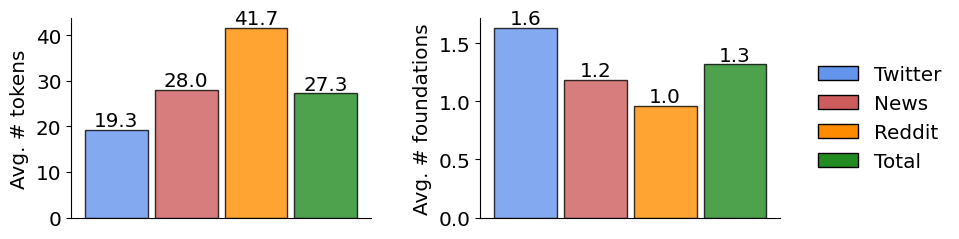

In [147]:
mean_toks = [mean_ci(x)[0] for x in [twitter.num_tokens, news.num_tokens, reddit.num_tokens, data.num_tokens]]
yerrs = [mean_ci(x)[1] for x in [twitter.num_tokens, news.num_tokens, reddit.num_tokens, data.num_tokens]]
yerrs = [0.5 * (x[1] - x[0]) for x in yerrs]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2.5))
# ax1.grid(axis="y", alpha=0.5)
ax1.set_xticks([])
for i, val in enumerate(mean_toks):
    ax1.text(x=i, y=val + 2, s=f"{val:.1f}", va="center", ha="center", size="x-large")
ax1.bar(np.arange(4), mean_toks, 
        # yerr=yerrs, capsize=7, 
        color=["cornflowerblue", "indianred", "darkorange", "forestgreen"],
        hatch=[None], alpha=0.8, edgecolor="black", width=0.9)
ax1.tick_params(axis="y", which='major', labelsize="x-large")
ax1.set_yticks([0, 10, 20, 30, 40])
ax1.set_ylabel("Avg. # tokens", size="x-large", labelpad=5)

mean_num_labels = [mean_ci(x)[0] for x in [twitter.num_labels, news.num_labels, reddit.num_labels, data.num_labels]]
yerrs = [mean_ci(x)[1] for x in [twitter.num_labels, news.num_labels, reddit.num_labels, data.num_labels]]
yerrs = [0.5 * (x[1] - x[0]) for x in yerrs]
# ax2.grid(axis="y", alpha=0.5)
for i, val in enumerate(mean_num_labels):
    ax2.text(x=i, y=val + 0.08, s=f"{val:.1f}", va="center", ha="center", size="x-large")
ax2.set_xticks([])
ax2.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
ax2.tick_params(axis="y", which='major', labelsize="x-large")
ax2.bar(np.arange(4), mean_num_labels, 
        # yerr=yerrs, capsize=7, 
        color=["cornflowerblue", "indianred", "darkorange", "forestgreen"],
        hatch=[None], alpha=0.8, edgecolor="black", width=0.9)
ax2.set_ylabel("Avg. # foundations", size="x-large", labelpad=5)

fig.tight_layout(w_pad=3)

sns.despine()

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [ 
    Patch(facecolor='cornflowerblue', edgecolor='black', label='Twitter'),
    Patch(facecolor='indianred', edgecolor='black', label='News'),
    Patch(facecolor='darkorange', edgecolor='black', label='Reddit'),
    Patch(facecolor='forestgreen', edgecolor='black', label='Total'),
]
ax2.legend(handles=legend_elements, loc='right', 
           bbox_to_anchor=(1.6, 0.5),
           fontsize="x-large", 
           title_fontsize="x-large", ncol=1,
           frameon=False)

plt.savefig("figs/mf_dataset_stats.pdf", bbox_inches="tight")